In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df= pd.read_csv("Amazon Sale Report.csv",encoding= 'unicode_escape')

In [3]:
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN


In [4]:
df.shape

(128976, 21)

In [5]:
df.tail()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
128971,128970,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,517.0,HYDERABAD,TELANGANA,500013.0,IN,False,NaN,NaN,NaN
128972,128971,402-9551604-7544318,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,M,Shipped,...,INR,999.0,GURUGRAM,HARYANA,122004.0,IN,False,NaN,NaN,NaN
128973,128972,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,Blazzer,XXL,Shipped,...,INR,690.0,HYDERABAD,TELANGANA,500049.0,IN,False,NaN,NaN,NaN
128974,128973,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,XS,Shipped,...,INR,1199.0,Halol,Gujarat,389350.0,IN,False,NaN,NaN,NaN
128975,128974,408-7436540-8728312,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,S,Shipped,...,INR,696.0,Raipur,CHHATTISGARH,492014.0,IN,False,NaN,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  currency            121176 non-null  object 
 12  Amount              121176 non-null  float64
 13  ship-city           128941 non-null  object 
 14  ship-state          128941 non-null  object 
 15  ship-postal-code    128941 non-nul

In [7]:
# drop unrelated / blacnk columns
df.drop(["New","PendingS"],axis = 1,inplace = True)

In [8]:
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN


In [9]:
# checking null values in data 
pd.isnull(df)

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128971,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
128972,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
128973,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
128974,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [10]:
pd.isnull(df).sum()

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Category                  0
Size                      0
Courier Status            0
Qty                       0
currency               7800
Amount                 7800
ship-city                35
ship-state               35
ship-postal-code         35
ship-country             35
B2B                       0
fulfilled-by          89713
dtype: int64

In [11]:
df.shape

(128976, 19)

In [12]:
# droping null values 
df.dropna(inplace = True)

In [13]:
df.tail()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by
128875,128874,405-4724097-1016369,06-01-2022,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,T-shirt,S,Shipped,1,INR,854.00,ALLUR,ANDHRA PRADESH,524315.0,IN,False,Easy Ship
128876,128875,403-9524128-9243508,06-01-2022,Cancelled,Merchant,Amazon.in,Standard,Blazzer,XL,On the Way,0,INR,734.29,Barabanki,UTTAR PRADESH,225001.0,IN,False,Easy Ship
128888,128887,405-6493630-8542756,05-31-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Trousers,M,Shipped,1,INR,518.00,NOIDA,UTTAR PRADESH,201301.0,IN,False,Easy Ship
128891,128890,407-0116398-1810752,05-31-22,Cancelled,Merchant,Amazon.in,Standard,Wallet,Free,On the Way,0,INR,398.10,MADURAI,TAMIL NADU,625007.0,IN,False,Easy Ship
128892,128891,403-0317423-9322704,05-31-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Blazzer,M,Shipped,1,INR,721.00,UTTAR BAGDOGRA,WEST BENGAL,734014.0,IN,False,Easy Ship


In [14]:
pd.isnull(df).sum()

index                 0
Order ID              0
Date                  0
Status                0
Fulfilment            0
Sales Channel         0
ship-service-level    0
Category              0
Size                  0
Courier Status        0
Qty                   0
currency              0
Amount                0
ship-city             0
ship-state            0
ship-postal-code      0
ship-country          0
B2B                   0
fulfilled-by          0
dtype: int64

In [15]:
df.columns


Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by'],
      dtype='object')

In [16]:
# changing the data types
df['Date'] = pd.to_datetime(df['Date'])

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37514 entries, 0 to 128892
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   index               37514 non-null  int64         
 1   Order ID            37514 non-null  object        
 2   Date                37514 non-null  datetime64[ns]
 3   Status              37514 non-null  object        
 4   Fulfilment          37514 non-null  object        
 5   Sales Channel       37514 non-null  object        
 6   ship-service-level  37514 non-null  object        
 7   Category            37514 non-null  object        
 8   Size                37514 non-null  object        
 9   Courier Status      37514 non-null  object        
 10  Qty                 37514 non-null  int64         
 11  currency            37514 non-null  object        
 12  Amount              37514 non-null  float64       
 13  ship-city           37514 non-null  object   

In [18]:
df['ship-postal-code'] =  df['ship-postal-code'].astype('int')

In [19]:
df['ship-postal-code'].dtype

dtype('int32')

In [20]:
df["currency"] = df["currency"].astype("category")

In [21]:
df['fulfilled-by']

0         Easy Ship
1         Easy Ship
3         Easy Ship
7         Easy Ship
12        Easy Ship
            ...    
128875    Easy Ship
128876    Easy Ship
128888    Easy Ship
128891    Easy Ship
128892    Easy Ship
Name: fulfilled-by, Length: 37514, dtype: object

In [22]:
df["fulfilled-by"] = df["fulfilled-by"].astype("category")

In [23]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by'],
      dtype='object')

In [24]:
# Rename columns 
df.rename(columns = {"Qty": "Quantity"},inplace = True)

In [25]:
 df.describe()

,index,Quantity,Amount,ship-postal-code
count,37514.000000,37514.000000,37514.000000,37514.000000
mean,60953.809858,0.867383,646.553960,463291.552754
std,36844.853039,0.354160,279.952414,194550.425637
min,0.000000,0.000000,0.000000,110001.000000
25%,27235.250000,1.000000,458.000000,370465.000000
50%,63470.500000,1.000000,629.000000,500019.000000
75%,91790.750000,1.000000,771.000000,600042.000000
max,128891.000000,5.000000,5495.000000,989898.000000


In [26]:
df.head()


,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Quantity,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by
0,0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,400081,IN,False,Easy Ship
1,1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085,IN,False,Easy Ship
3,3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008,IN,False,Easy Ship
7,7,406-7807733-3785945,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,S,Shipped,1,INR,399.00,HYDERABAD,TELANGANA,500032,IN,False,Easy Ship
12,12,405-5513694-8146768,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,XS,Shipped,1,INR,399.00,Amravati.,MAHARASHTRA,444606,IN,False,Easy Ship


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37514 entries, 0 to 128892
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   index               37514 non-null  int64         
 1   Order ID            37514 non-null  object        
 2   Date                37514 non-null  datetime64[ns]
 3   Status              37514 non-null  object        
 4   Fulfilment          37514 non-null  object        
 5   Sales Channel       37514 non-null  object        
 6   ship-service-level  37514 non-null  object        
 7   Category            37514 non-null  object        
 8   Size                37514 non-null  object        
 9   Courier Status      37514 non-null  object        
 10  Quantity            37514 non-null  int64         
 11  currency            37514 non-null  category      
 12  Amount              37514 non-null  float64       
 13  ship-city           37514 non-null  object   

In [28]:
df.describe(include = "O")

,Order ID,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,ship-city,ship-state,ship-country
count,37514,37514,37514,37514,37514,37514,37514,37514,37514,37514,37514
unique,34664,11,1,1,1,8,11,3,4698,58,1
top,171-5057375-2831560,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,T-shirt,M,Shipped,BENGALURU,MAHARASHTRA,IN
freq,12,28741,37514,37514,37514,14062,6806,31859,2839,6236,37514


In [29]:
# use describe() for specific() columns
df[["Quantity","Amount"]].describe()

,Quantity,Amount
count,37514.000000,37514.000000
mean,0.867383,646.553960
std,0.354160,279.952414
min,0.000000,0.000000
25%,1.000000,458.000000
50%,1.000000,629.000000
75%,1.000000,771.000000
max,5.000000,5495.000000


# Explortory Data Analysis

In [30]:
df.columns


Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Quantity',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by'],
      dtype='object')

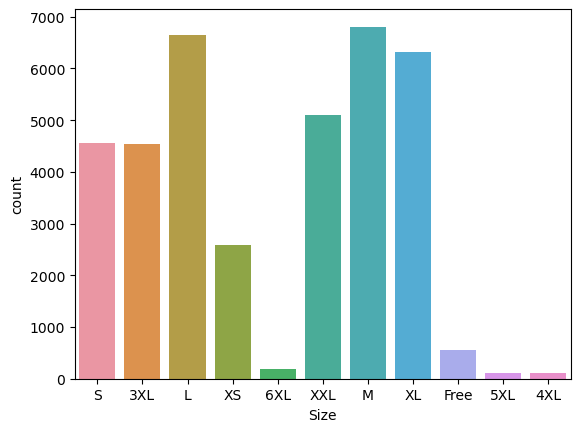

In [31]:
ax = sns.countplot(x = "Size", data = df)

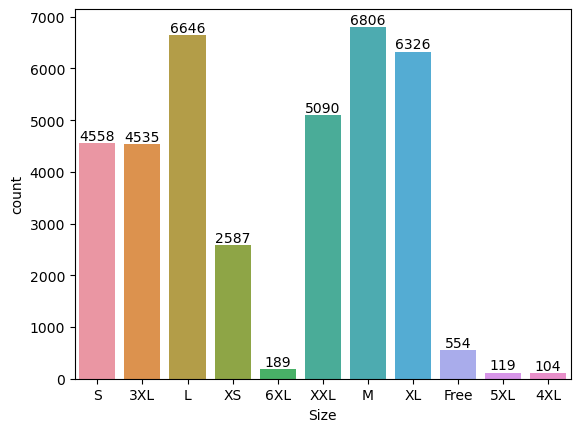

In [32]:
ax = sns.countplot(x = "Size", data = df)

for bars in ax.containers:
    ax.bar_label(bars)

### Note: from  above grapphs you can see that most of the people buys M-size

In [33]:
# bar_label method. This method automatically adds text labels on top of each 
# bar with the corresponding count

# Group by
####  the groupby() function in pandas is used to group base on one or more columns in a dataframe



In [34]:
df.groupby(["Size"], as_index = False)["Quantity"].sum().sort_values(by="Quantity",ascending = False)

,Size,Quantity
6,M,5905
5,L,5795
8,XL,5481
10,XXL,4465
0,3XL,3972
7,S,3896
9,XS,2191
4,Free,467
3,6XL,170
2,5XL,104


<Axes: xlabel='Size', ylabel='Quantity'>

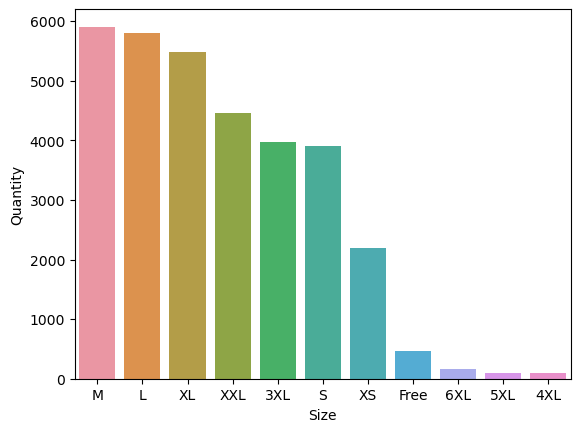

In [35]:
S_qty=df.groupby(["Size"], as_index = False)["Quantity"].sum().sort_values(by="Quantity",ascending = False)

sns.barplot(x = "Size", y = "Quantity", data = S_qty)

##### from above graph you can see that most of the qty buys M-size in the sales

In [36]:
df.columns


Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Quantity',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by'],
      dtype='object')

<Axes: xlabel='Courier Status', ylabel='count'>

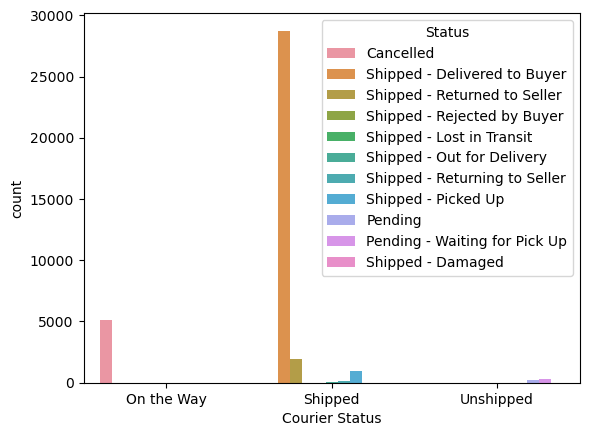

In [37]:
sns.countplot(data = df, x = "Courier Status",hue = "Status")

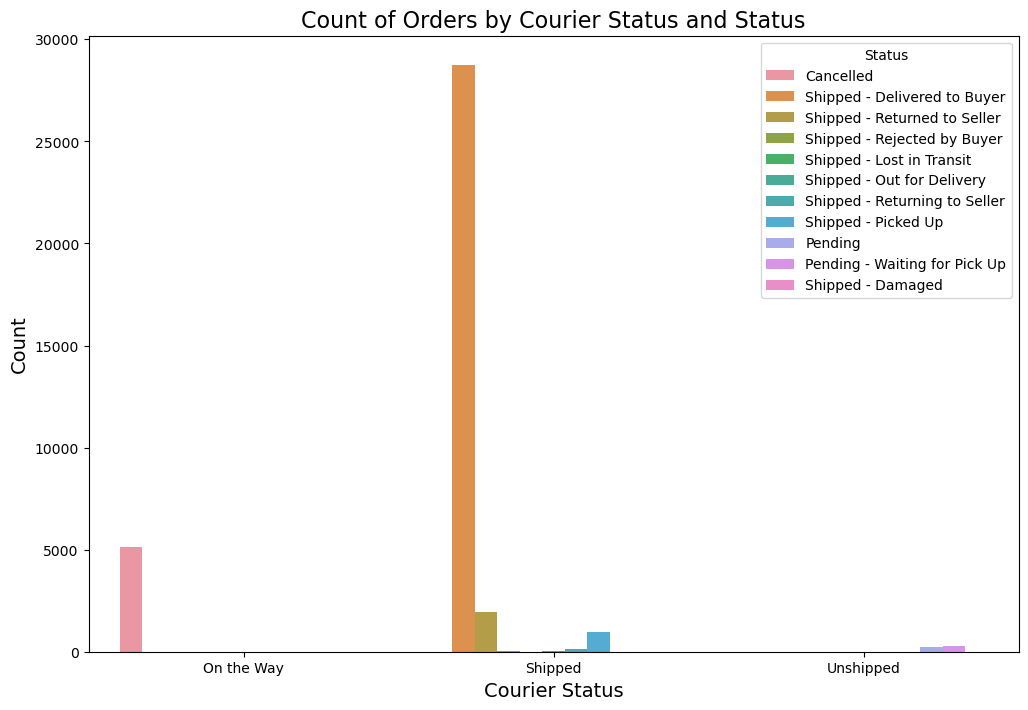

In [38]:
plt.figure(figsize = (12,8))

sns.countplot(data = df, x = "Courier Status",hue = "Status")

plt.xlabel("Courier Status", fontsize=14)
plt.ylabel("Count", fontsize=14)

plt.title("Count of Orders by Courier Status and Status", fontsize=16)

plt.show()


##### from above graph the majority of the orders are shipped through the courer

<Axes: >

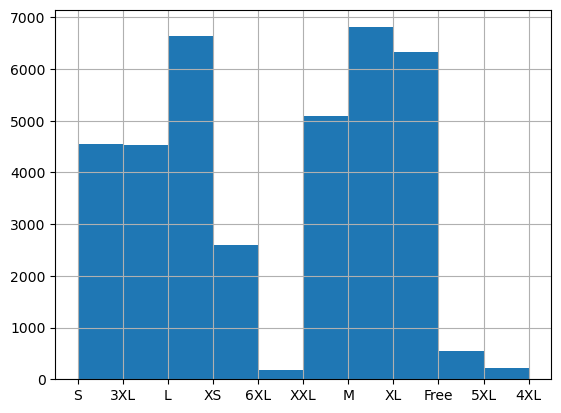

In [39]:
# histrogram
df["Size"].hist()


In [40]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Quantity',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by'],
      dtype='object')

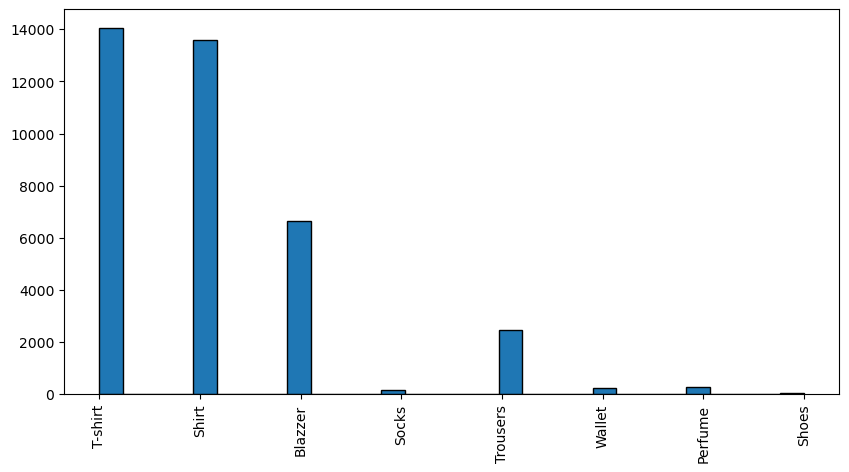

In [41]:
df["Category"] = df["Category"].astype("str")
column_data = df["Category"]

plt.figure(figsize = (10,5))
plt.hist(column_data, bins = 30, edgecolor = "Black")
plt.xticks(rotation = 90) #Rotates x-axis labels for better readability.
           
plt.show()

In [42]:
# In the context of a histogram, "bins" refer to the intervals into which the data is divided. 

##### from above graph you can see that most of the buyers are T-shirt

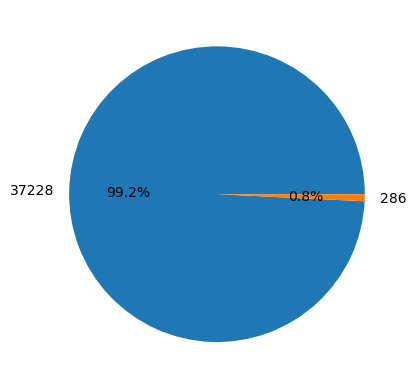

In [43]:
# checking B2B data by using pie chart
B2B_check = df["B2B"].value_counts()

# plot the pie chart
plt.pie(B2B_check, labels=B2B_check, autopct='%1.1f%%')

plt.show()

In [44]:
df["B2B"]

0         False
1         False
3         False
7         False
12        False
          ...  
128875    False
128876    False
128888    False
128891    False
128892    False
Name: B2B, Length: 37514, dtype: bool

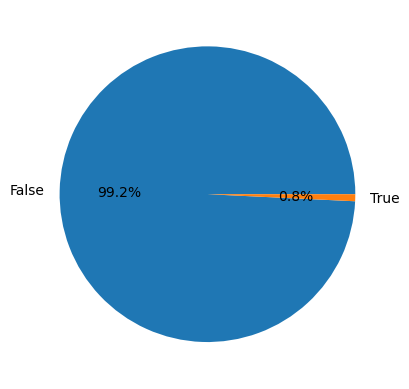

In [45]:
# checking B2B data by using pie chart
B2B_check = df["B2B"].value_counts()

# plot the pie chart
plt.pie(B2B_check, labels=B2B_check.index, autopct='%1.1f%%')

plt.show()

In [ ]:
# A scatter plot is a type of data visualization that is used to display the
# relationship between two continuous variables. It is particularly useful for 
# identifying patterns, trends, and relationships between variables. Here are 
# some key uses of scatter plots:

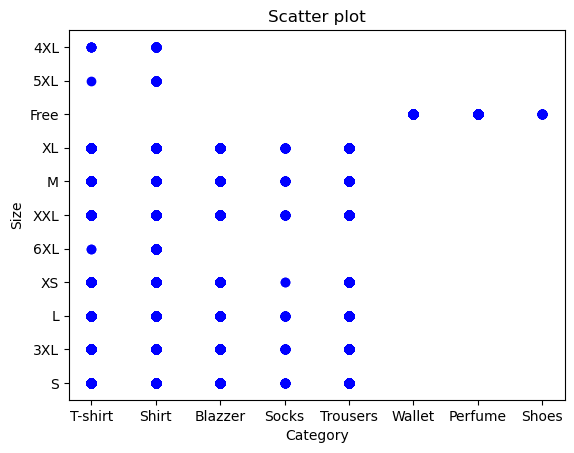

In [52]:
#prepare data for scatter plot
x_data = df["Category"]
y_data = df["Size"]

#plot the scatter plot
plt.scatter(x_data,y_data,color='blue')
plt.xlabel("Category")
plt.ylabel("Size")
plt.title("Scatter plot")


plt.show()

In [53]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Quantity',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by'],
      dtype='object')

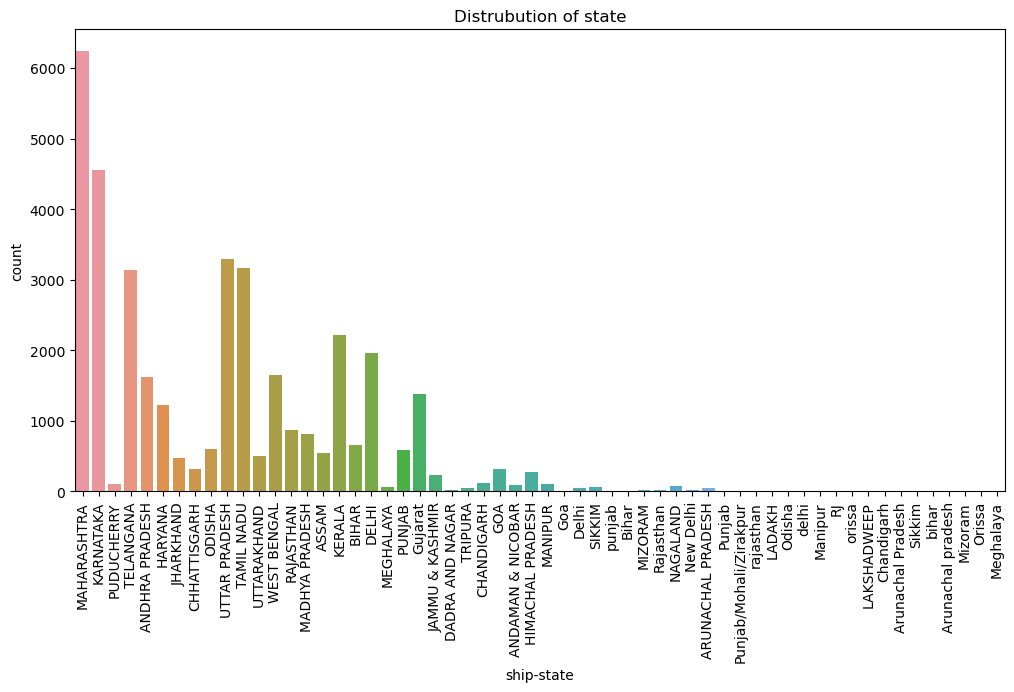

In [54]:
# plot count of cities by state
plt.figure(figsize= (12,6))
sns.countplot(data= df, x = "ship-state")
plt.xlabel("ship-state")
plt.ylabel("count")
plt.title("Distrubution of state")
plt.xticks(rotation =90)

plt.show()

In [66]:
#top 10 states for ship-state
df["ship-state"].value_counts().head(10)

MAHARASHTRA       6236
KARNATAKA         4550
UTTAR PRADESH     3298
TAMIL NADU        3167
TELANGANA         3136
KERALA            2213
DELHI             1955
WEST BENGAL       1653
ANDHRA PRADESH    1621
Gujarat           1382
Name: ship-state, dtype: int64

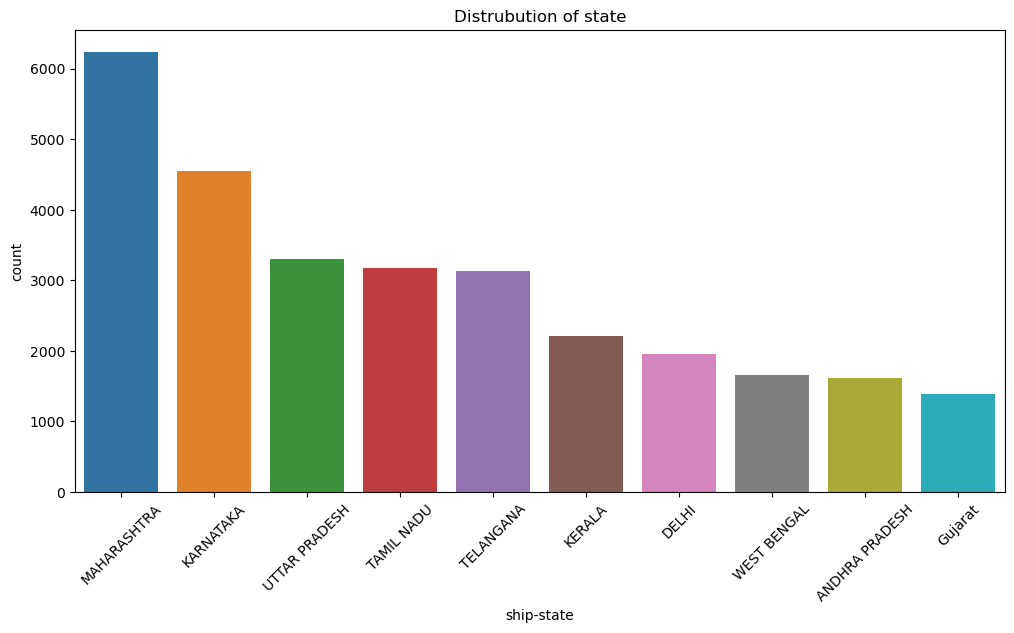

In [69]:
top_10_state  = df["ship-state"].value_counts().head(10)

plt.figure(figsize= (12,6))
sns.countplot(data= df, x = "ship-state",order=top_10_state.index)
# sns.countplot(data=df[df['ship-state'].isin(top_10_state.index)], x='ship-state')
plt.xlabel("ship-state")
plt.ylabel("count")
plt.title("Distrubution of state")
plt.xticks(rotation =45)

plt.show()

##### Note: From above graph you can see the most of the buyers are maharashtra state


### Conclusion

#### The data analysis reveals that the business has a significant customer base in Maharashtra state, mainly serves retailers, fulfills orders through Amazon, experiences high demand for T-shirts, and sees M-Size as the preferred choice among buyers.